In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('dfavgscores238.xlsx', index_col= 0)

I want to choose a dataset from the filtered one ( z score etc. ) and then do these correlation thingies for the numeric data. 

## The below is for comparing columns that are non-numeric. 

In [3]:
freq_table = (df['avgscore'].value_counts(normalize = True, bins=10)*100).sort_index()
freq_table

(83.868, 151.789]      0.333615
(151.789, 219.036]     2.199927
(219.036, 286.283]     5.669044
(286.283, 353.53]      9.072888
(353.53, 420.777]     14.009428
(420.777, 488.024]    20.674483
(488.024, 555.271]    24.864015
(555.271, 622.517]    18.479391
(622.517, 689.764]     4.479633
(689.764, 757.011]     0.217575
Name: avgscore, dtype: float64

In [4]:
df['avgscore_binned'] = pd.cut(df['avgscore'], bins=10)

In [5]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore_binned'])

In [6]:
contingency_table

avgscore_binned,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
ASBH02A,,,,,,,,,,
No,3,55,182,358,540,718,629,331,70,4
Yes,135,855,2163,3395,5255,7834,9656,7313,1783,86


In [10]:
contingency_table.index

Index(['No', 'Yes'], dtype='object', name='ASBH02A')

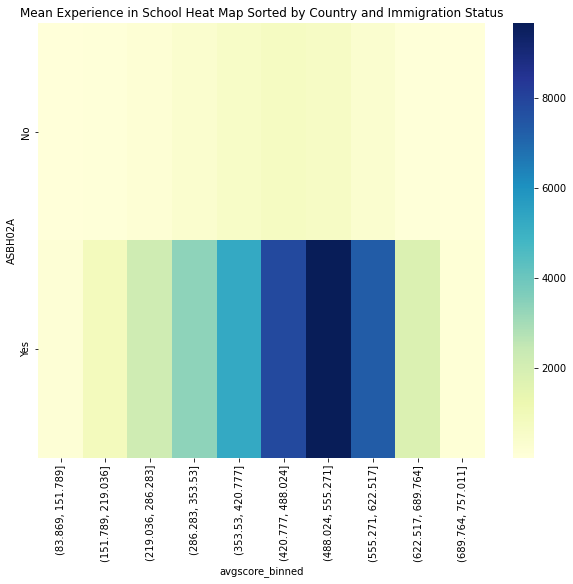

In [7]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=False, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

In [8]:
# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()
contingency_table_reset

avgscore_binned,ASBH02A,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
0,No,3,55,182,358,540,718,629,331,70,4
1,Yes,135,855,2163,3395,5255,7834,9656,7313,1783,86


In [11]:
contingency_table_reset.index

RangeIndex(start=0, stop=2, step=1)

In [14]:
contingency_table_melted = contingency_table_reset.melt(id_vars='ASBH02A', var_name='avgscore_binned', value_name='count')
contingency_table_melted

,ASBH02A,avgscore_binned,count
0,No,"(83.869, 151.789]",3
1,Yes,"(83.869, 151.789]",135
2,No,"(151.789, 219.036]",55
3,Yes,"(151.789, 219.036]",855
4,No,"(219.036, 286.283]",182
5,Yes,"(219.036, 286.283]",2163
6,No,"(286.283, 353.53]",358
7,Yes,"(286.283, 353.53]",3395
8,No,"(353.53, 420.777]",540
9,Yes,"(353.53, 420.777]",5255


This doesn't work without resetting the index because asbh02a is the index and not a column. that's why the index needs to be reset. 

In [16]:
# Convert Interval objects to strings
contingency_table_melted['avgscore_binned'] = contingency_table_melted['avgscore_binned'].astype(str)

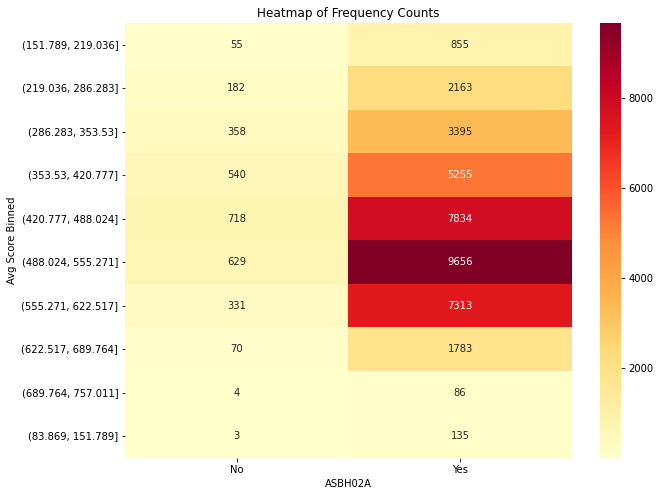

In [18]:
# Assuming contingency_table_melted is your DataFrame
# You might need to pivot the DataFrame to create a matrix for the heatmap
## index, column, values
heatmap_data = contingency_table_melted.pivot("avgscore_binned", "ASBH02A", "count")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt="d")

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()

In [35]:
# Step 2: Calculate the total counts for 'No' and 'Yes'
total_no = heatmap_data[heatmap_data['ASBH02A'] == 'No']['count'].sum()
total_yes = heatmap_data[heatmap_data['ASBH02A'] == 'Yes']['count'].sum()

# Step 3: Convert counts to percentages
heatmap_data['percentage'] = heatmap_data.apply(lambda x: (x['count'] / total_no * 100) if x['ASBH02A'] == 'No' else (x['count'] / total_yes * 100), axis=1)

# Step 4: Reshape the data for the heatmap
heatmap_data_percentage = heatmap_data.pivot('ASBH02A', 'avgscore_binned', 'percentage')

# Step 5: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_percentage, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Percentage of Total Count by ASBH02A and Avg Score Binned')
plt.show()

KeyError: 'ASBH02A'

In [ ]:
# Calculate the total number of elements in each group
total_counts = df_selected.groupby(['Country','ASBH02A']).size()

# Calculate the percentage of missing values
percentage_missing = pivot_table_test.div(total_counts, axis=0) * 100

print("Pivot Table with Percentage of Missing Values:\n", percentage_missing)

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_missing, annot=False, cmap='viridis', fmt='.2f')

plt.title('Percentage of Missing Values Heatmap')
plt.show()

the above needs to be sorted.

In [22]:
import plotly.express as px

In [23]:
# Plot the heatmap using Plotly
fig = px.density_heatmap(contingency_table_melted, x='ASBH02A', y='avgscore_binned', z='count', color_continuous_scale='agsunset')
fig.update_layout(title='Heatmap of Frequency Counts')
fig.show()

I want to compare this by country

The above is not so useful - I need percentages again - but percentage of what? total nos and total yesses?

Should compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant

## Let's see how crosstabbing works with multiple columns

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [24]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

NaN    38671
0.0     1110
3.0      852
6.0      483
8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [25]:
df['MINAGEARRIVAL'] = df['MINAGEARRIVAL'].fillna(-1.0)

In [26]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

-1.0    38671
 0.0     1110
 3.0      852
 6.0      483
 8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [27]:
pivot_minage = df.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [28]:
pivot_minage

MINAGEARRIVAL,-1.0,0.0,3.0,6.0,8.0
Country,,,,,
Austria,535.931404,524.691549,503.023525,482.467533,472.698753
Egypt,380.234984,382.087467,360.526565,353.167965,359.496124
France,522.219901,514.789067,500.251059,487.735549,449.952812
Germany,546.167948,513.748950,489.432386,491.374898,495.923077
Iran,422.308155,413.120203,437.669405,450.368901,429.309478
Jordan,368.776349,380.605999,385.670465,381.076742,372.786823
Netherlands,544.917812,546.704431,510.434272,532.347393,529.268667
Sweden,565.960709,547.588860,506.832225,496.426190,486.933911
Turkey,507.204903,461.440636,438.160717,469.426985,446.103548


In [29]:
# Step 2: Calculate the mean score for each country
country_mean_scores = pivot_minage.groupby(level='Country').mean()

# If you want to sum the mean scores across all assessment columns (if there are multiple), you can do:
country_mean_scores['MeanTotal'] = country_mean_scores.mean(axis=1)

# Sort countries by total values
sorted_countries_means = country_mean_scores.sort_values(by='MeanTotal', ascending=False).index

### Create a custom sorter for ASBH02A
## asbh02a_sorter = ['Yes', 'No']

# Get the current index as a DataFrame for sorting
index_df = pivot_minage.index.to_frame()

# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries_means, ordered=True)
##index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_minage.loc[index_df.index]

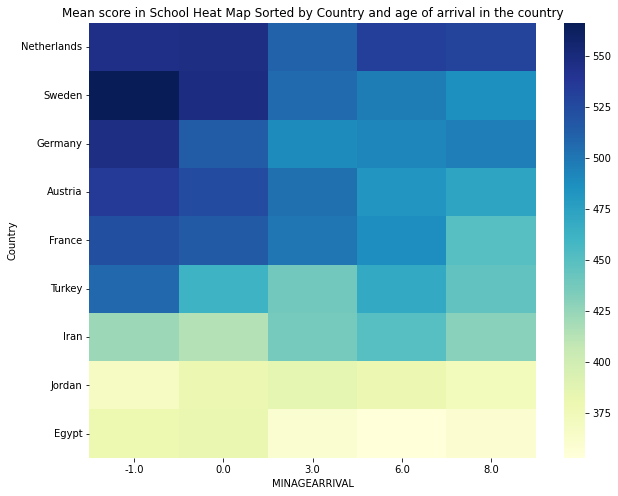

In [30]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=False, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()